In [0]:
import pandas as pd

The dataset has been stored in My Drive under content

In [0]:
import os

base_dir = '/content/drive/My Drive/'

train_dir = os.path.join(base_dir, 'ISBI2016_ISIC_Part3_Training_Data')


In [0]:
!mkdir Project

In [0]:
!mkdir Project/benign

In [0]:
#import os, re, os.path
#mypath = "Project/malignant"
#for root, dirs, files in os.walk(mypath):
#    for file in files:
#        os.remove(os.path.join(root, file))

In [0]:
!mkdir Project/malignant

Creating two new folders and arranging the data into two folders to enable CNN to distinguish classes

In [0]:
import shutil
import os
import pandas as pd

df1=pd.read_csv("/content/drive/My Drive/ISBI2016_ISIC_Part3_Training_GroundTruth.csv",header=None)

source = '/content/drive/My Drive/ISBI2016_ISIC_Part3_Training_Data/'
dest1 = '/content/Project/benign'
dest2 ='/content/Project/malignant'

files = os.listdir(source)

for i in range (df1.shape[0]):
    if df1.loc[i, 1]=="benign":
        shutil.copy(source+df1.loc[i,0]+'.jpg', dest1)
    else:
        shutil.copy(source+df1.loc[i,0]+'.jpg', dest2)
        

In [0]:
#Changing directories
base_dir = '/content/'

train_dir = os.path.join(base_dir, 'Project')

# Directory with our training picture
benign_dir= os.path.join(train_dir, 'benign')
malignant_dir = os.path.join(train_dir, 'malignant')


In [0]:
#Printing total number of images
print('total training Benign images :', len(os.listdir(      benign_dir ) ))
print('total training Malignant images :', len(os.listdir(      malignant_dir ) ))

total training Benign images : 727
total training Malignant images : 173


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
trainb_fnames = os.listdir( benign_dir )
trainm_fnames = os.listdir( malignant_dir )



In [0]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

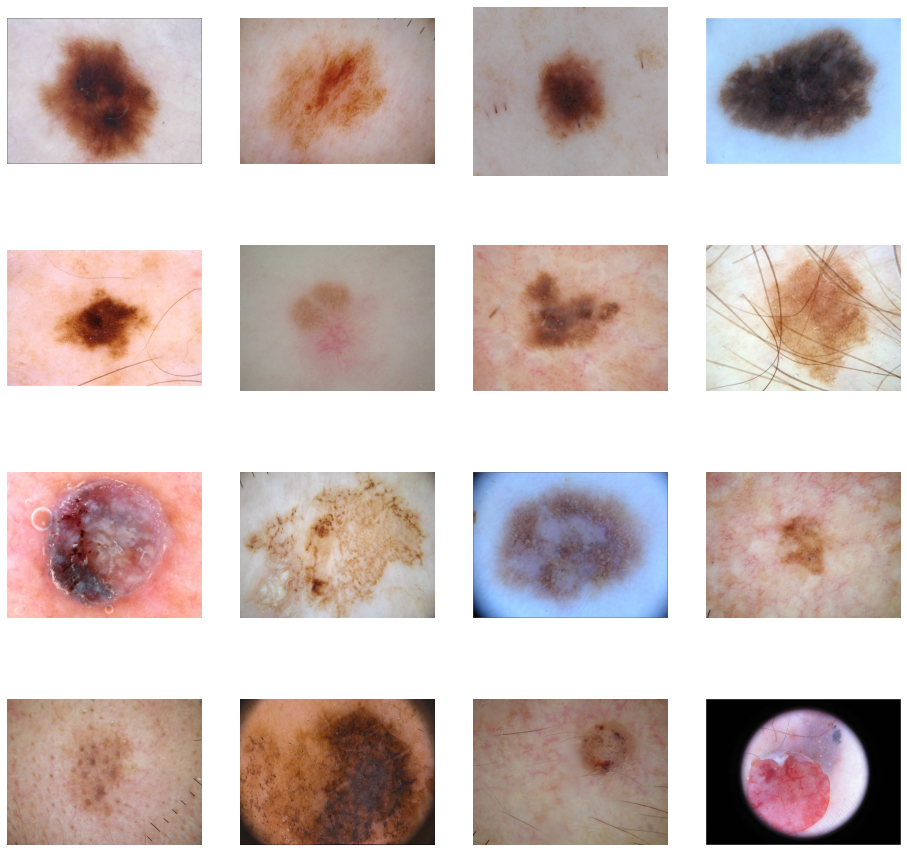

In [0]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_benign_pix = [os.path.join(benign_dir, fname) 
                for fname in trainb_fnames[ pic_index-8:pic_index] 
               ]

next_m_pix = [os.path.join(malignant_dir, fname) 
                for fname in trainm_fnames[ pic_index-8:pic_index]
               ]
for i, img_path in enumerate(next_benign_pix+next_m_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [0]:
#Creating CNN Model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               5308544   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 7

In [0]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/Project'
# All images will be rescaled by 1./255.
# Flow training images in batches of 20 using generator

train_datagen = ImageDataGenerator(
        rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        #batch_size=batch_size,
        class_mode='binary')

Found 900 images belonging to 2 classes.


In [0]:
history = model.fit(train_generator, batch_size=20, steps_per_epoch=900,epochs=10)

Epoch 1/10
900/900 [==============================] - 1752s 2s/step - loss: 0.3371 - accuracy: 0.8656
Epoch 2/10
900/900 [==============================] - 1739s 2s/step - loss: 0.0369 - accuracy: 0.9898
Epoch 3/10
900/900 [==============================] - 1753s 2s/step - loss: 5.0686e-04 - accuracy: 1.0000
Epoch 4/10
900/900 [==============================] - 1749s 2s/step - loss: 1.4716e-04 - accuracy: 1.0000
Epoch 5/10
900/900 [==============================] - 1739s 2s/step - loss: 6.1226e-05 - accuracy: 1.0000
Epoch 6/10
900/900 [==============================] - 1730s 2s/step - loss: 2.9713e-05 - accuracy: 1.0000
Epoch 7/10
900/900 [==============================] - 1734s 2s/step - loss: 1.5068e-05 - accuracy: 1.0000
Epoch 8/10
900/900 [==============================] - 1744s 2s/step - loss: 7.9911e-06 - accuracy: 1.0000
Epoch 9/10
900/900 [==============================] - 1738s 2s/step - loss: 4.4510e-06 - accuracy: 1.0000
Epoch 10/10
900/900 [==============================] -

In [0]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'],'bo--', label = "acc")

    plt.title("train_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.title("train_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

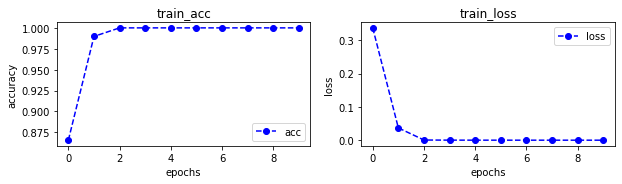

In [0]:
plot_accuracy_loss(history)


In [0]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/Project'
# All images will be rescaled by 1./255.
# Flow training images in batches of 20 using generator

train_datagen = ImageDataGenerator(validation_split=0.2,
        rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        #batch_size=batch_size,
        class_mode='binary',
        subset='training')

val_generator = train_datagen.flow_from_directory(
     train_dir,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        #batch_size=batch_size,
        class_mode='binary',
    subset='validation'
)

Found 721 images belonging to 2 classes.
Found 179 images belonging to 2 classes.


In [0]:
history = model1.fit(train_generator, steps_per_epoch=900,epochs=5,validation_data=val_generator,validation_steps=179)

Epoch 1/5
900/900 [==============================] - 1237s 1s/step - loss: 0.1897 - accuracy: 0.9263 - val_loss: 6.3784 - val_accuracy: 0.6651
Epoch 2/5
900/900 [==============================] - 1248s 1s/step - loss: 0.0199 - accuracy: 0.9937 - val_loss: 7.9290 - val_accuracy: 0.6481
Epoch 3/5
900/900 [==============================] - 1243s 1s/step - loss: 8.5446e-05 - accuracy: 1.0000 - val_loss: 8.6795 - val_accuracy: 0.6423
Epoch 4/5
900/900 [==============================] - 1237s 1s/step - loss: 1.8501e-05 - accuracy: 1.0000 - val_loss: 8.9213 - val_accuracy: 0.6597
Epoch 5/5
900/900 [==============================] - 1236s 1s/step - loss: 7.0286e-06 - accuracy: 1.0000 - val_loss: 9.0802 - val_accuracy: 0.6589


In [0]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,10))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], label = "val_acc")

    plt.title("train_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], label = "val_loss")

    plt.title("train_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

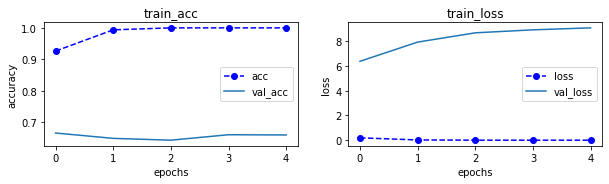

In [0]:
plot_accuracy_loss(history)


In [0]:

model2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [0]:
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_dir = '/content/Project'
# All images will be rescaled by 1./255.
# Flow training images in batches of 20 using generator

train_datagen = ImageDataGenerator(validation_split=0.2,
        rescale=1./255,
      rotation_range=40, #These 7 rows are augmentations to increase our dataset by twisting the images
      width_shift_range=0.2, 
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        train_dir,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        #batch_size=batch_size,
        class_mode='binary',
        subset='training')

val_generator = train_datagen.flow_from_directory(
     train_dir,  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        #batch_size=batch_size,
        class_mode='binary',
    subset='validation'
)

Found 721 images belonging to 2 classes.
Found 179 images belonging to 2 classes.


In [0]:
class_weight = {train_generator.class_indices['benign']: 173/900,
                train_generator.class_indices['malignant']: 727/900}

In [0]:
history_1 = model2.fit(train_generator, steps_per_epoch=900,class_weight=class_weight,epochs=5,validation_data=val_generator,validation_steps=179)

Epoch 1/5
900/900 [==============================] - 1453s 2s/step - loss: 0.1596 - accuracy: 0.7214 - val_loss: 2.3748 - val_accuracy: 0.4719
Epoch 2/5
900/900 [==============================] - 1366s 2s/step - loss: 0.1492 - accuracy: 0.7273 - val_loss: 2.6944 - val_accuracy: 0.5919
Epoch 3/5
900/900 [==============================] - 1394s 2s/step - loss: 0.1412 - accuracy: 0.7450 - val_loss: 3.0178 - val_accuracy: 0.5887
Epoch 4/5
900/900 [==============================] - 1478s 2s/step - loss: 0.1371 - accuracy: 0.7548 - val_loss: 1.5697 - val_accuracy: 0.5932
Epoch 5/5
900/900 [==============================] - 1444s 2s/step - loss: 0.1293 - accuracy: 0.7725 - val_loss: 5.5472 - val_accuracy: 0.6034


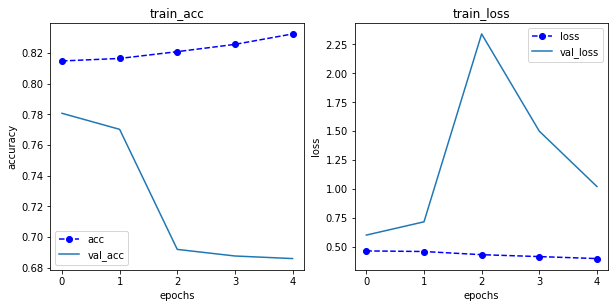

In [0]:
plot_accuracy_loss(history_1)


No handles with labels found to put in legend.


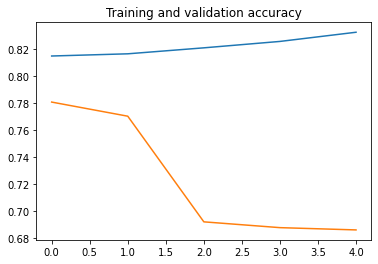

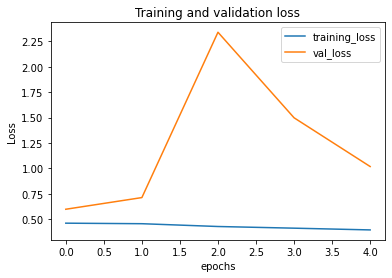

In [0]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history_1.history[     'accuracy' ]
val_acc  = history_1.history[ 'val_accuracy' ]
loss     = history_1.history[    'loss' ]
val_loss = history_1.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc, label='training_acc' )
plt.plot  ( epochs, val_acc , label='val_accuracy')
plt.title ('Training and validation accuracy')
plt.figure()
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.legend()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss ,label='training_loss')
plt.plot  ( epochs, val_loss ,label='val_loss')
plt.title ('Training and validation loss'   )
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()